# **Thank You for opening this notebook!!!**

## **This notebook tutorial is for those who are beginners to machine learning.**

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Stochastic Gradient Descent Classifier**

**3. Support Vector Classifier(SVC) **

*Then I use cross validation evaluation technique to optimize the model performance.*

**1. Grid Search CV**

**2. Cross Validation Score**

https://www.kaggle.com/code/geetanshkalra/wine-quality-check-for-beginners
https://www.kaggle.com/code/vishalyo990/prediction-of-quality-of-wine/notebook

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('winequality-red.csv')

In [3]:
#Let's check how the data is distributed
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(df.shape, 'shape', '\n')
print(df.dtypes, 'types', '\n')
print(df['quality'].unique(), 'uniq', '\n')
print(df['quality'].isnull().sum(), 'isna')

(1599, 12) shape 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object types 

[5 6 7 4 8 3] uniq 

0 isna


In [6]:
from collections import Counter
print(sorted(Counter(df['quality']).items()))

[(3, 10), (4, 53), (5, 681), (6, 638), (7, 199), (8, 18)]


## **Let's do some plotting to know how the data columns are distributed in the dataset**

<Axes: xlabel='quality', ylabel='fixed acidity'>

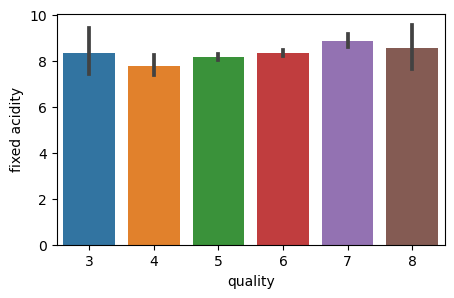

In [7]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

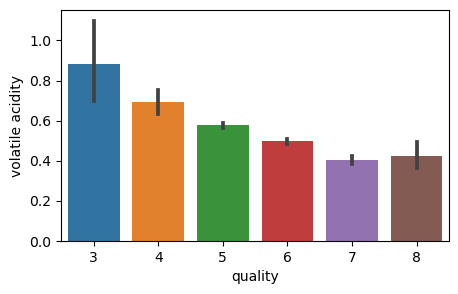

In [8]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

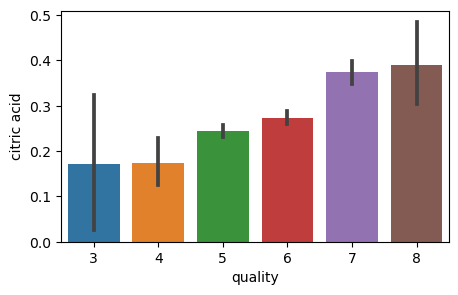

In [9]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

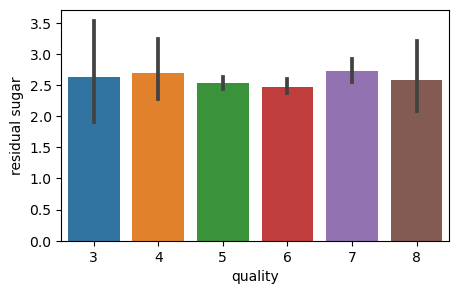

In [10]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

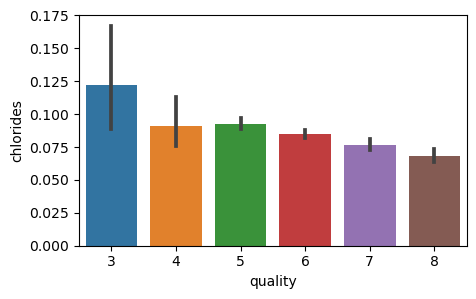

In [11]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

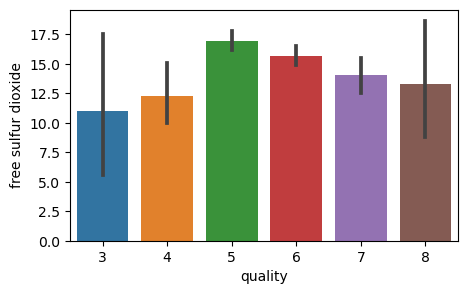

In [12]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

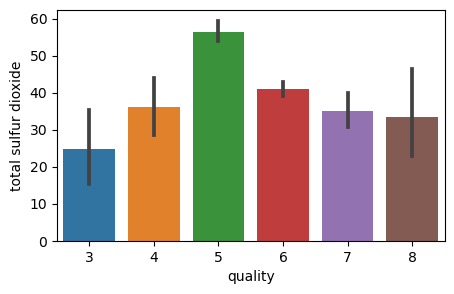

In [13]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

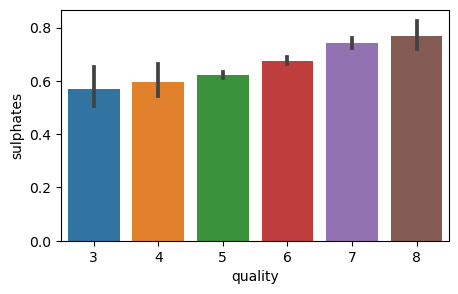

In [14]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

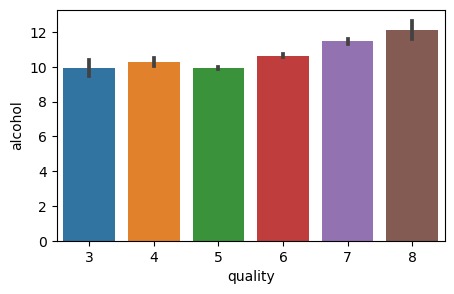

In [15]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

## Preprocessing Data for performing Machine learning algorithms I variant

In [16]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (0, 5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [17]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [18]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [19]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

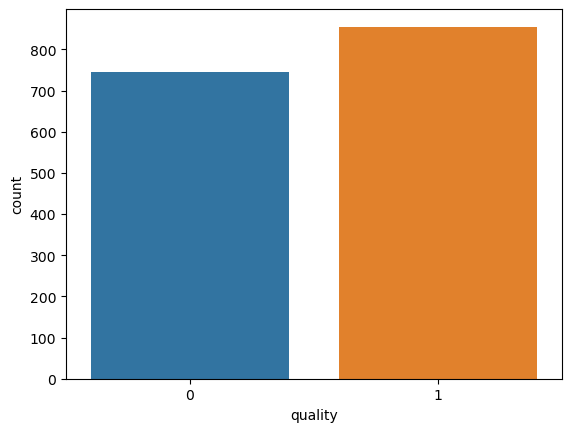

In [20]:
sns.countplot(data=df, x='quality')


In [21]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [133]:
#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [114]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [134]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [136]:
lr = logistic.fit(x_train,y_train)


In [137]:
prediction = lr.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7875

In [139]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       154
           1       0.78      0.81      0.80       166

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



In [140]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction))


[[117  31]
 [ 37 135]]


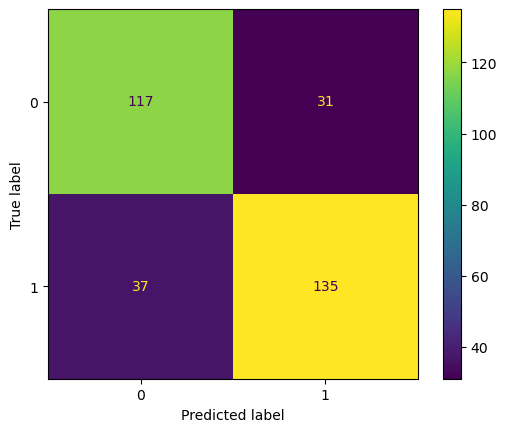

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, values_format='d')


## Preprocessing Data for performing Machine learning algorithms II variant

In [32]:
df2 = pd.read_csv('winequality-red.csv')

In [33]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins2 = (2, 6.5, 8)
group_names2 = ['bad', 'good']
df2['quality'] = pd.cut(df2['quality'], bins = bins2, labels = group_names2)

In [34]:
#Now lets assign a labels to our quality variable
label_quality2 = LabelEncoder()

In [35]:
#Bad becomes 0 and good becomes 1 
df2['quality'] = label_quality2.fit_transform(df2['quality'])

In [36]:
df2['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

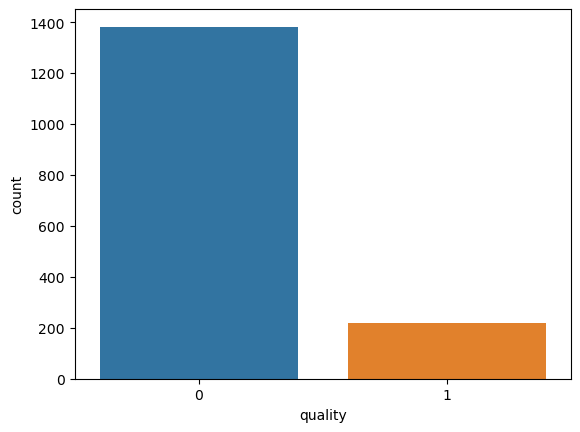

In [37]:
sns.countplot(data=df2, x='quality')


In [38]:
#Now seperate the dataset as response variable and feature variabes
X2 = df2.drop('quality', axis = 1)
y2 = df2['quality']

In [109]:
#Train and Test splitting of data 
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 1234)

#Applying Standard scaling to get optimized result
sc2 = StandardScaler()

x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.fit_transform(x_test2)

In [110]:
logistic2 = LogisticRegression()
lr2 = logistic.fit(x_train2,y_train2)
prediction2 = lr.predict(x_test2)


In [111]:
accuracy_score(y_test2,prediction2)

0.8875

In [112]:
print(classification_report(prediction2,y_test2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       374
           1       0.31      0.58      0.40        26

    accuracy                           0.89       400
   macro avg       0.64      0.74      0.67       400
weighted avg       0.93      0.89      0.90       400



In [43]:
print(confusion_matrix(y_test2, prediction2))


[[340  11]
 [ 34  15]]


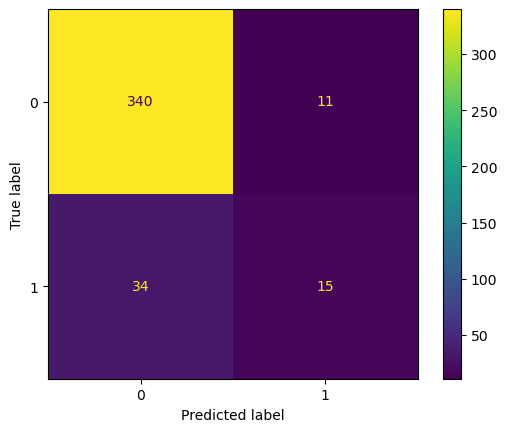

In [44]:
ConfusionMatrixDisplay.from_estimator(lr2, x_test2, y_test2, values_format='d')
